In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\weather_data.csv")

In [3]:
df

,ghi,dhi,precip,timestamp_utc,temp,app_temp,dni,snow_depth,wind_cdir,rh,...,clouds_mid,wind_dir,snow,clouds_low,solar_rad,wind_gust_spd,timestamp_local,description(output),code,icon
0,0,0,0.000,2025-01-15T12:00:00,25.9,18.7,0,0,NNW,51,...,0,350,0,0,0.00000,11.9,2025-01-15T07:00:00,Few clouds,801,c02n
1,385,87,0.000,2025-01-15T15:00:00,29.3,22.8,748,0,NNW,41,...,0,360,0,0,384.62994,11.9,2025-01-15T10:00:00,Clear Sky,800,c01d
2,542,101,0.000,2025-01-15T18:00:00,36.5,32.0,831,0,NNW,30,...,0,340,0,0,542.37920,9.6,2025-01-15T13:00:00,Few clouds,801,c02d
3,193,65,0.000,2025-01-15T21:00:00,38.3,35.6,581,0,NW,28,...,0,310,0,0,192.98000,6.9,2025-01-15T16:00:00,Clear Sky,800,c01d
4,0,0,0.000,2025-01-16T00:00:00,29.3,27.5,0,0,W,46,...,0,280,0,0,0.00000,2.0,2025-01-15T19:00:00,Few clouds,801,c02n
5,0,0,0.000,2025-01-16T03:00:00,24.8,22.6,0,0,W,56,...,0,260,0,0,0.00000,1.1,2025-01-15T22:00:00,Few clouds,801,c02n
6,0,0,0.000,2025-01-16T06:00:00,23.5,21.2,0,0,W,60,...,0,260,0,0,0.00000,1.8,2025-01-16T01:00:00,Few clouds,801,c02n
7,0,0,0.000,2025-01-16T09:00:00,22.5,19.9,0,0,WSW,63,...,0,240,0,0,0.00000,2.0,2025-01-16T04:00:00,Few clouds,801,c02n
8,0,0,0.000,2025-01-16T12:00:00,21.9,23.4,0,0,SSW,65,...,0,210,0,0,0.00000,3.1,2025-01-16T07:00:00,Few clouds,801,c02n
9,387,88,0.000,2025-01-16T15:00:00,35.1,31.3,749,0,SW,42,...,40,220,0,0,386.72770,8.5,2025-01-16T10:00:00,Few clouds,801,c02d


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ghi                  40 non-null     int64  
 1   dhi                  40 non-null     int64  
 2   precip               40 non-null     float64
 3   timestamp_utc        40 non-null     object 
 4   temp                 40 non-null     float64
 5   app_temp             40 non-null     float64
 6   dni                  40 non-null     int64  
 7   snow_depth           40 non-null     int64  
 8   wind_cdir            40 non-null     object 
 9   rh                   40 non-null     int64  
 10  pod                  40 non-null     object 
 11  pop                  40 non-null     int64  
 12  ozone                40 non-null     int64  
 13  clouds_hi            40 non-null     int64  
 14  clouds               40 non-null     int64  
 15  vis                  40 non-null     float

In [5]:
df.isnull().sum()

ghi                    0
dhi                    0
precip                 0
timestamp_utc          0
temp                   0
app_temp               0
dni                    0
snow_depth             0
wind_cdir              0
rh                     0
pod                    0
pop                    0
ozone                  0
clouds_hi              0
clouds                 0
vis                    0
wind_spd               0
wind_cdir_full         0
slp                    0
datetime               0
ts                     0
pres                   0
dewpt                  0
uv                     0
clouds_mid             0
wind_dir               0
snow                   0
clouds_low             0
solar_rad              0
wind_gust_spd          0
timestamp_local        0
description(output)    0
code                   0
icon                   0
dtype: int64

In [6]:
duplicates_count = df.duplicated().sum()
print(f"The number of duplicates: {duplicates_count}")

The number of duplicates: 0


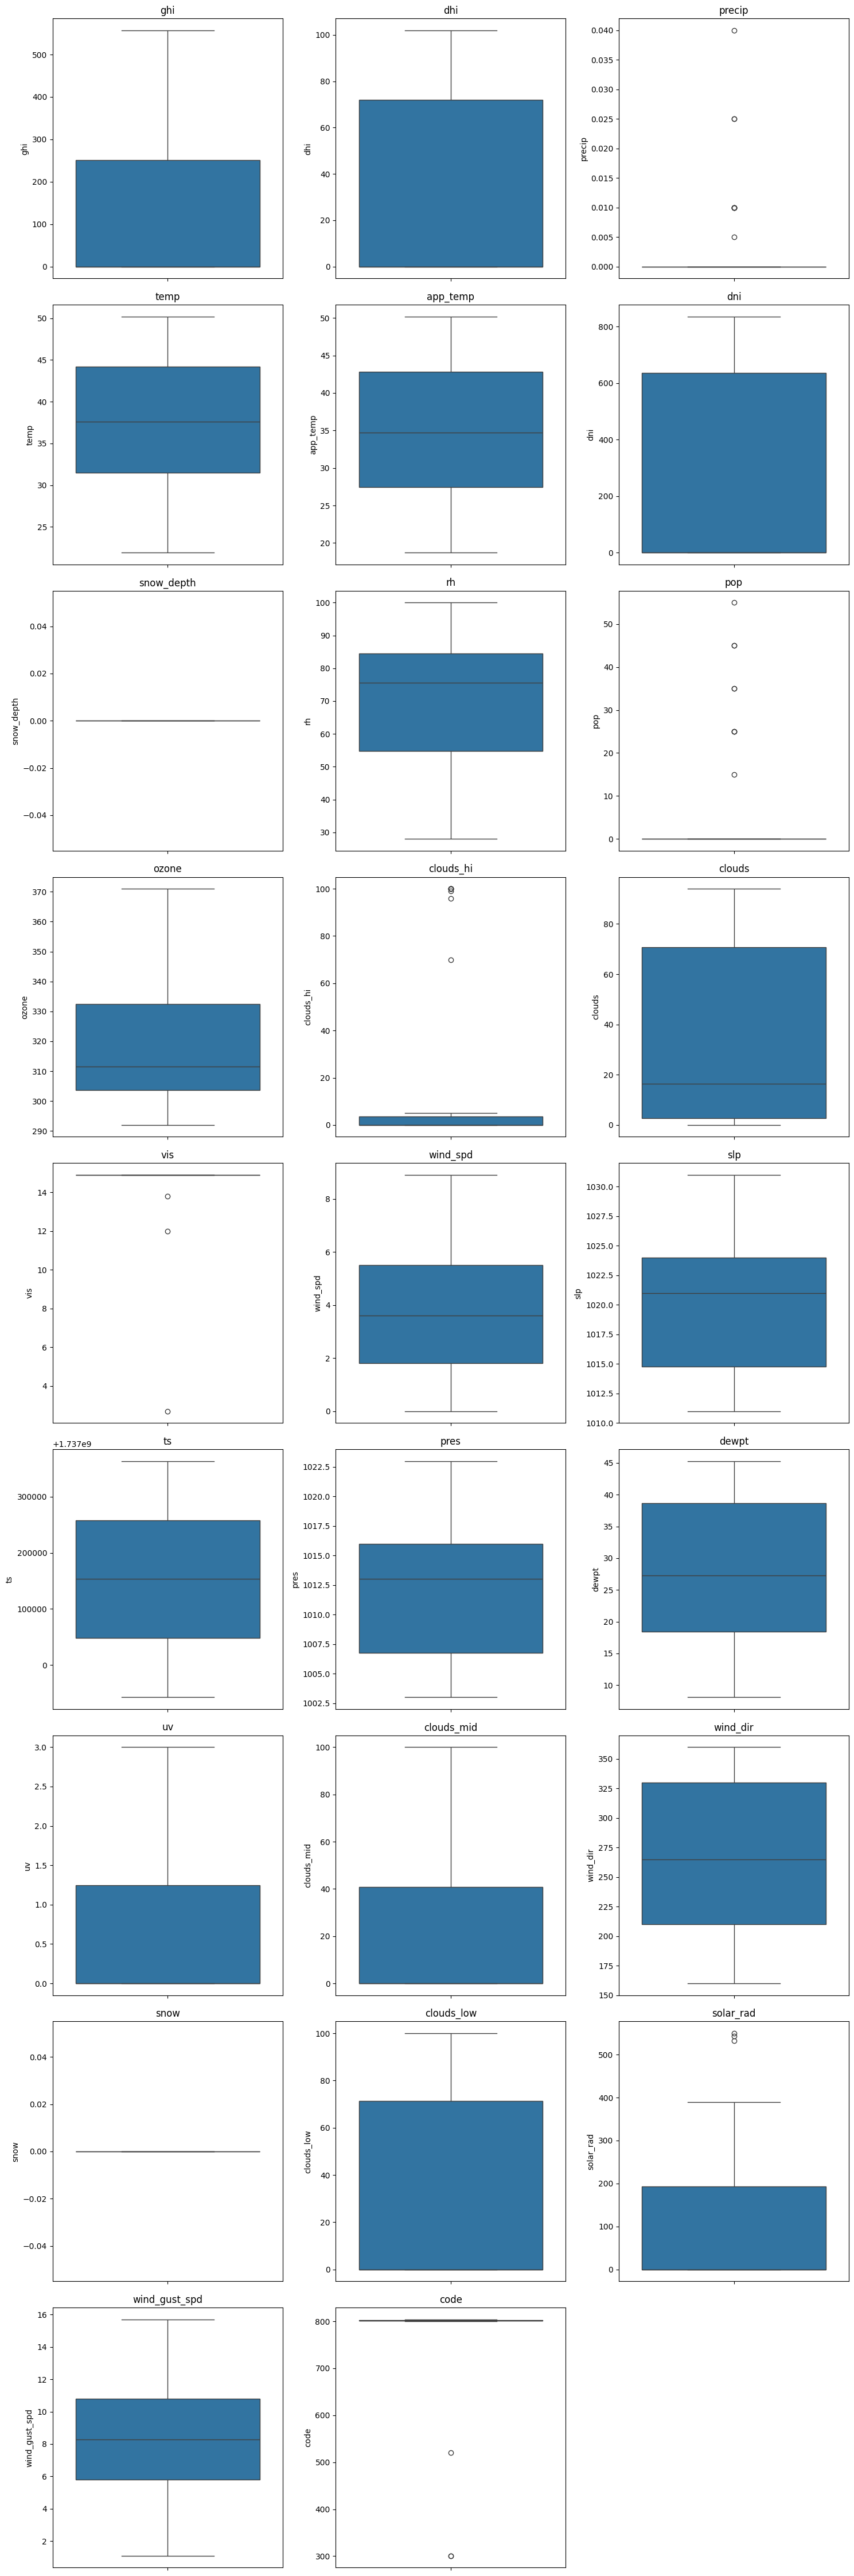

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_boxplots(df):
    num_col = df.select_dtypes(include=['number']).columns.tolist()
    
    n_cols = 3 
    n_rows = (len(num_col) + n_cols - 1) // n_cols  
    
    plt.figure(figsize=(15, 5 * n_rows))
    
    for i, col in enumerate(num_col):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    
    plt.tight_layout()
    plt.show()

plot_all_boxplots(df)

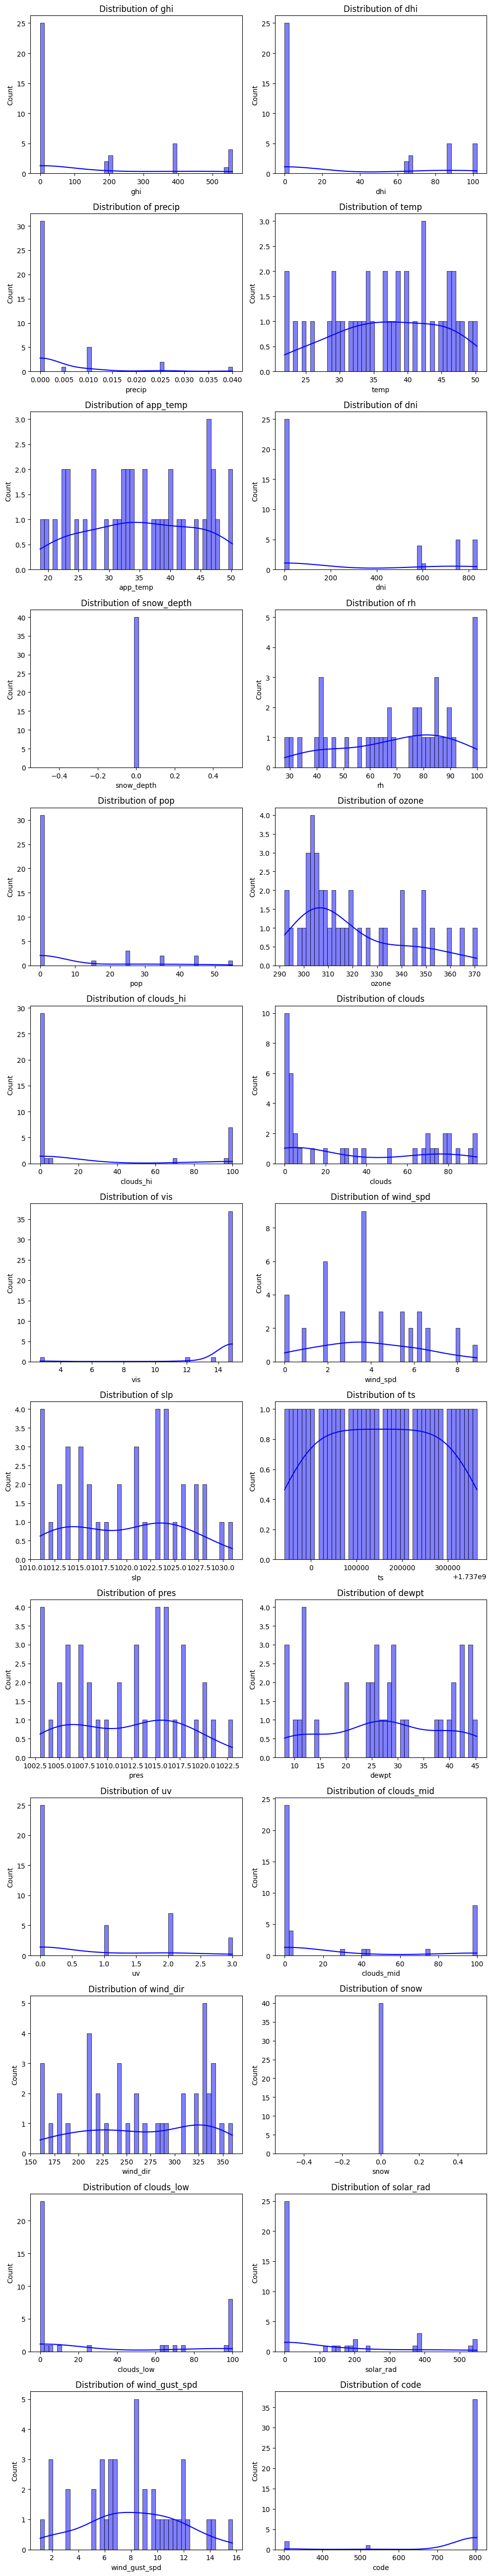

In [8]:
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")


def plot_all_histograms(df):
    df = df.replace([float('inf'), float('-inf')], float('nan'))
    
    num_col = df.select_dtypes(include=['number']).columns.tolist()
    
    n_cols = 2
    n_rows = (len(num_col) + 1) // n_cols 

    plt.figure(figsize=(10, 4 * n_rows))

    for i, col in enumerate(num_col):
        plt.subplot(n_rows, n_cols, i + 1) 
        sns.histplot(df[col], kde=True, bins=45, color='blue') 
        plt.title(f"Distribution of {col}")
    
    plt.tight_layout() 
    plt.show()

plot_all_histograms(df)

                    ghi       dhi    precip      temp  app_temp       dni  \
ghi            1.000000  0.998945  0.075382  0.594736  0.538197  1.000000   
dhi            0.998945  1.000000  0.065030  0.584941  0.527208  0.998945   
precip         0.075382  0.065030  1.000000  0.459025  0.468794  0.075382   
temp           0.594736  0.584941  0.459025  1.000000  0.977057  0.594736   
app_temp       0.538197  0.527208  0.468794  0.977057  1.000000  0.538197   
dni            1.000000  0.998945  0.075382  0.594736  0.538197  1.000000   
snow_depth          NaN       NaN       NaN       NaN       NaN       NaN   
rh            -0.334289 -0.349882  0.665933  0.180384  0.225504 -0.334289   
pop            0.061407  0.051054  0.998682  0.453670  0.462785  0.061407   
ozone         -0.252157 -0.250803 -0.550201 -0.311476 -0.292138 -0.252157   
clouds_hi      0.280306  0.263193  0.333200  0.266785  0.317656  0.280306   
clouds        -0.007255 -0.022004  0.641890  0.452896  0.472247 -0.007255   

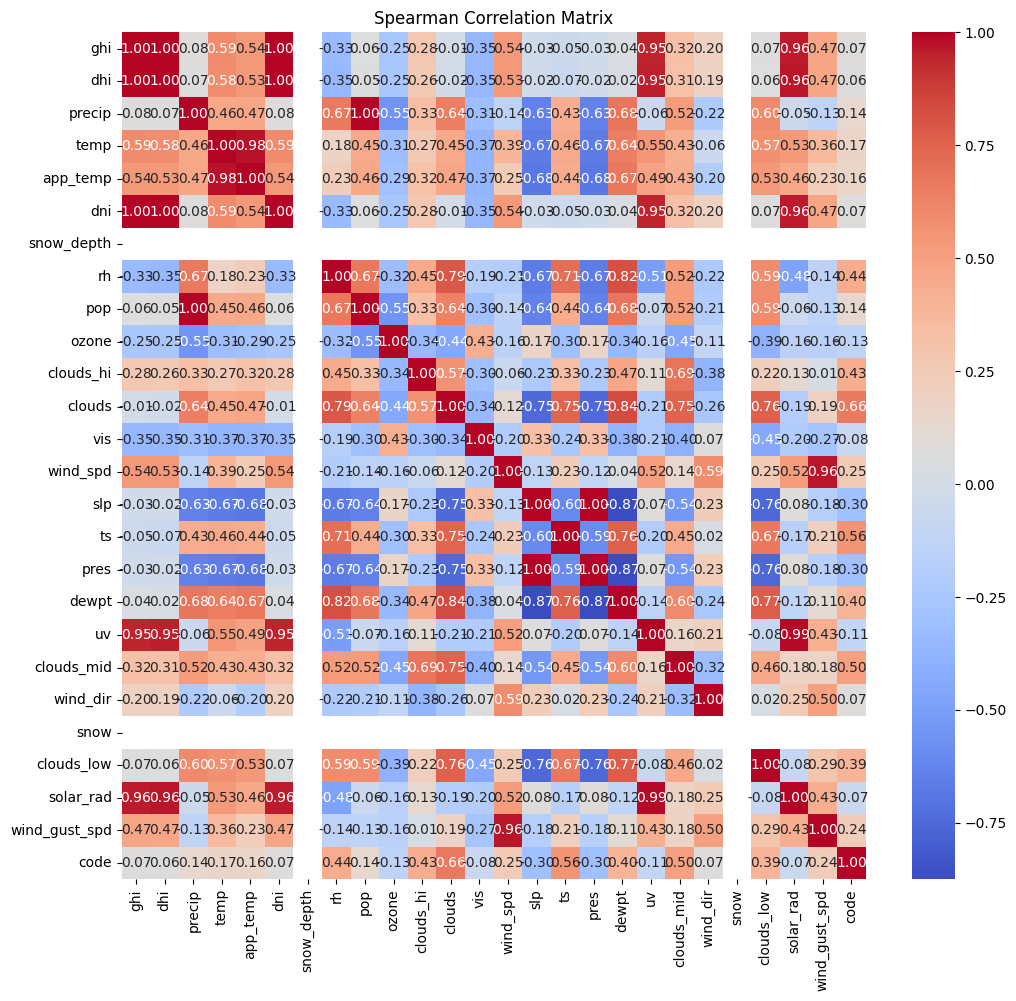

In [9]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')

print(spearman_corr)

plt.figure(figsize=(12, 11))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

def encode_object_columns(df):
    df_encoded = df.copy()
    le = LabelEncoder()
    
    for col in df_encoded.select_dtypes(include=['object']).columns:
        df_encoded[col] = le.fit_transform(df_encoded[col])
    
    return df_encoded

df_encoded = encode_object_columns(df)

In [11]:
df_encoded.head()

,ghi,dhi,precip,timestamp_utc,temp,app_temp,dni,snow_depth,wind_cdir,rh,...,clouds_mid,wind_dir,snow,clouds_low,solar_rad,wind_gust_spd,timestamp_local,description(output),code,icon
0,0,0,0.0,0,25.9,18.7,0,0,0,51,...,0,350,0,0,0.00000,11.9,0,3,801,2
1,385,87,0.0,1,29.3,22.8,748,0,0,41,...,0,360,0,0,384.62994,11.9,1,1,800,0
2,542,101,0.0,2,36.5,32.0,831,0,0,30,...,0,340,0,0,542.37920,9.6,2,3,801,1
3,193,65,0.0,3,38.3,35.6,581,0,1,28,...,0,310,0,0,192.98000,6.9,3,1,800,0
4,0,0,0.0,4,29.3,27.5,0,0,6,46,...,0,280,0,0,0.00000,2.0,4,3,801,2


In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ghi                  40 non-null     int64  
 1   dhi                  40 non-null     int64  
 2   precip               40 non-null     float64
 3   timestamp_utc        40 non-null     int32  
 4   temp                 40 non-null     float64
 5   app_temp             40 non-null     float64
 6   dni                  40 non-null     int64  
 7   snow_depth           40 non-null     int64  
 8   wind_cdir            40 non-null     int32  
 9   rh                   40 non-null     int64  
 10  pod                  40 non-null     int32  
 11  pop                  40 non-null     int64  
 12  ozone                40 non-null     int64  
 13  clouds_hi            40 non-null     int64  
 14  clouds               40 non-null     int64  
 15  vis                  40 non-null     float

In [13]:
df.shape

(40, 34)

In [14]:
df_encoded.shape

(40, 34)

In [15]:
X = df_encoded.drop(['description(output)'], axis = 1)
y = df_encoded['description(output)']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=150)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
print(pd.Series(y_train).value_counts())

description(output)
3    11
5     6
6     3
0     3
1     2
2     2
4     1
Name: count, dtype: int64


In [19]:
from sklearn.model_selection import StratifiedKFold

rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

param_rf = {
    'n_estimators': [50, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

skf = StratifiedKFold(n_splits=3)
grid_search_rf = GridSearchCV(rf_classifier, param_rf, cv=skf, scoring='f1_weighted')
grid_search_rf.fit(X_train_scaled, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [3, 5], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 200]},
             scoring='f1_weighted')

In [20]:
grid_search_rf.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [21]:
best_gs_rf = grid_search_rf.best_estimator_

In [22]:
print('Score on train data = ', round(best_gs_rf.score(X_train_scaled, y_train), 4))
print('Score on test data = ', round(best_gs_rf.score(X_test_scaled, y_test), 4))

Score on train data =  0.9643
Score on test data =  0.9167


In [26]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["description(output)"]= le.fit_transform(df["description(output)"])

In [27]:
categorical_features = df.select_dtypes(include=['object']).columns
c= list(categorical_features)

In [28]:
from catboost import CatBoostClassifier
cb= CatBoostClassifier(cat_features=c)
cb.fit(X_train,y_train)

Learning rate set to 0.065937
0:	learn: 1.9108975	total: 256ms	remaining: 4m 15s
1:	learn: 1.8799293	total: 312ms	remaining: 2m 35s
2:	learn: 1.8499707	total: 356ms	remaining: 1m 58s
3:	learn: 1.8317927	total: 391ms	remaining: 1m 37s
4:	learn: 1.8113896	total: 402ms	remaining: 1m 20s
5:	learn: 1.7925798	total: 424ms	remaining: 1m 10s
6:	learn: 1.7687794	total: 482ms	remaining: 1m 8s
7:	learn: 1.7213083	total: 527ms	remaining: 1m 5s
8:	learn: 1.6981600	total: 561ms	remaining: 1m 1s
9:	learn: 1.6778588	total: 589ms	remaining: 58.3s
10:	learn: 1.6586046	total: 615ms	remaining: 55.3s
11:	learn: 1.6430321	total: 669ms	remaining: 55.1s
12:	learn: 1.6193493	total: 708ms	remaining: 53.8s
13:	learn: 1.5937850	total: 731ms	remaining: 51.5s
14:	learn: 1.5750308	total: 836ms	remaining: 54.9s
15:	learn: 1.5470005	total: 923ms	remaining: 56.8s
16:	learn: 1.5284120	total: 994ms	remaining: 57.5s
17:	learn: 1.4961090	total: 1.05s	remaining: 57.4s
18:	learn: 1.4837642	total: 1.11s	remaining: 57.4s
19:	l

In [29]:
y_pred = cb.predict(X_test)

In [30]:
y_pred

array([[0],
       [3],
       [6],
       [3],
       [5],
       [3],
       [3],
       [3],
       [3],
       [5],
       [1],
       [3]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score*100

100.0